# Report of Assignment 2
The required libraries are:


*   numpy
*   matplotlib.pyplot
*   copy
*   drive

Furkan Oz

foz@okstate.edu

# Question 1

In this question, it is asked to derive update rule for the regression. There are 2 layers and the activation function is sigmoid function for hidden layer and a linear function for output layer. First, the definitions are:

$z_1=w_1~x+b_1$

$a_1=g(z_1)$

$z_2=w_2~a_1+b_2$

$a_2=z_2$

$\hat y=a_2$

$L=0.5\sum(\hat y-y)^2$

The update formula is:

$w=w-\alpha\frac{dL}{dw}$

$b=b-\alpha\frac{dL}{db}$

To calculate the update formula we need following derivatives:

$\frac{dL}{dw_2}=(\hat y-y)\frac{d}{dw_2}(\hat y-y)=(\hat y-y)\frac{d\hat y}{dw_2}$

$\frac{dL}{dw_2}=(\hat y-y)\frac{da_2}{dw_2}=(\hat y-y)~a_1$

$\frac{dL}{dw_2}=(\hat y-y)~a_1$

$\frac{dL}{db_2}=(\hat y-y)$

With the same logic, we can calculate the derivative of $L$ with respect to $w_1$ with the chain rule as:

$\frac{dL}{dw_1}=\frac{dL}{da_2}\frac{da_2}{dz_2}\frac{dz_2}{da_1}\frac{da_1}{dz_1}\frac{dz_1}{dw_1}$

From here, the terms can be calculated as:

$\frac{dL}{da_2}\frac{da_2}{dz_2}=a_2-y$

$\frac{dz_2}{da_1}=w_2$

$\frac{da_1}{dz_1}=g'(z_1)=g(z_1)~(1-g(z_1))$

$\frac{dz_1}{dw_1}=x$

Finally the derivation can be expressed as:

$\frac{dL}{dw_1}=(a_2-y)w_2~g(z_1)~(1-g(z_1))~x$

$\frac{dL}{db_1}=(a_2-y)w_2~g(z_1)~(1-g(z_1))$

With the derivations the update rule can be obtained and weights can be calculated.

The difference from the binary classification is the cost function itself. In the regression, we adopted mean square error approach. However, in classification we have log loss function. Thus, it leads to different derivations. Additionally, in binary classification, output layer has sigmoid activation function. However, in regression, in the output layer, we have linear activation function









# Question 2
# Part 1)
This is a regression problem. Thus, linear activation function will be used to model the system in output layer. Activation functions such as Sigmoid, RelU, or tanh, limits the output as it avoids model fitting for a regression problem.
# Part 2)
Number of neurons in output layer for a regression problem is directly related to label size which is the size of column vector of y (assuming row corresponds to sample size). For this particular problem it is 1.
# Part 3)
The model is trained with 10 neurons in hidden layer. Then, test data is predicted with the trained data. The average MSE loss and accuracy is reported below. The first code block belongs to NeuralNetwork class. The second belongs to data visualization. The third block belongs to training details. In the fourth code block, test data used in the prediction with trained model and average MSE and accuracy are reported. The accuracy is calculated with the following formula:

$Accuracy = \frac{|y_{prediction}|}{|y_{true}|}$

When the accuracy is 1, $y_{prediction}=y_{true}$ and depending on the how close to 1, accuracy is improving.

# Part 4)
As mentioned in the previous part, the third block belongs to training details. The loss and accuracy with respect to number of iterations are plotted in there. It has to be noted that loss plot is in logarithmic scale as it decreases drastically. 

According to results, accuracy is drastically increasing at lower number of iterations but slowing down as it gets close to 1. MSE is also decreasing but its behavior is changing. Even, it changes with each different runs because of the random initial conditions for weights.

# Part 5)
The learning rate is changed in between 0.001 and 1. The results are reported at fifth code block. 

According to results, learning rate is important for the model. When the learning rate is higher than 0.01 or higher, the model diverged. Only 2 learning rate tests succesfully converged which are 0.001 and 0.005. Although, the performance of them are varying because of the randomized initial weights, it looks like 0.001 usually shows better performance.

It has to be noted that these results are obtained for 10 neurons.

# Part 6) 
For the changing number of neurons, the update rule remains same. Only change in the model is the sizes of weights and biases. The final loss along with the true and predicted data are given in sixth code block.

According to results, 10 neurons has the least average loss in the final iterations. For better comparison, number of iterations are limitted to 10000 for each cases. It is concluded that increasing number of neurons decreases the loss. Although it is not shown in this project, the loss decreament with number of neurons increament would saturate at one point. Additionally, depending on the randomly initialized weights, in some runs, 9 neurons can perform well. However, 10 neurons are still better choice. 

Please note that in every run the results are chaning and performance of them varying because of the random weight initialization. In general, the observation is as mentioned in the previous paragrah.

# Part 7)
Chaning the activation function does not exactly change the update rule but it has an effect on it. Derivative of $a_1$ with respect to $z_1$ is changing. Even though, the definition of the derivative remains same, the derivative itself will change. Additionally, $g(z_1)$ will change as well. However, in this code, the activation function is implemented in such a way that it can be modified easily. The results are given in seventh code block.

According to results, ReLU is converging significantly better than others. Tanh is also better than sigmoid. However, it has to be noted that ReLU diverged with higher learning rate while others are still slowly converging. Even though ReLU is much better in convergence, learning rate needs to be chosen carefully.

In [7]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 1                                                       #####
##### Question - 1 - 2                                                     #####
#####                                                                      #####
##### 09/16/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################
import copy
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

class NeuralNetwork:
    def __init__(self, NN, alpha=0.001, n_iters=50000, eps=1e-6, activationFunction='sigmoid'):
        # init parameters
        self.alp = alpha
        self.n_iters = n_iters
        self.z1 = None
        self.b1 = None
        self.W1 = None
        self.z2 = None
        self.b2 = None
        self.W2 = None
        self.nNeuron  = NN
        self.eps = eps
        self.actFunc = activationFunction
    
    def _init_params(self):
        # init parameters
        self.W1 = np.random.rand(self.nFeatures,self.nNeuron)
        self.b1 = np.random.rand(1,self.nNeuron)
        self.W2 = np.random.rand(self.nNeuron,1)
        self.b2 = np.random.rand(1,1)
    
    def _update_params(self, dw1, db1, dw2, db2):
        # update parameters
        self.W1 -= self.alp * dw1
        self.b1 -= self.alp * db1
        self.W2 -= self.alp * dw2
        self.b2 -= self.alp * db2
    
    def _get_prediction(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        if self.actFunc == 'sigmoid':
          a1 = self._sigmoid(self.z1)
        elif self.actFunc == 'ReLU':
          a1 = self._ReLU(self.z1)
        elif self.actFunc == 'tanh':
          a1 = self._tanh(self.z1)
        self.z2 = np.dot(a1, self.W2) + self.b2
        a2 = copy.deepcopy(self.z2)
        return a1, a2
    

    def _sigmoid(self,aa):
        xx = copy.deepcopy(aa)
        return 1/(1 + np.exp(-xx))

    def _sigmoid_derivative(self,aaa):
        return self._sigmoid(aaa)*(1-self._sigmoid(aaa))

    def _ReLU(self, aaaa):
        xxx = copy.deepcopy(aaaa)
        xxx[aaaa<=0] = 0
        return xxx
       
    def _ReLU_derivative(self, aaaaa):
        sizex, sizey = aaaaa.shape
        deriv = np.zeros(sizex * sizey).reshape(sizex, sizey)
        deriv[aaaaa>0] = 1
        return deriv

    def _tanh(self, aaaaaa):
        xxxx = copy.deepcopy(aaaaaa)
        return np.tanh(xxxx)
       
    def _tanh_derivative(self, aaaaaaa):
        xxxxx = copy.deepcopy(aaaaaaa)
        return 1.-np.tanh(xxxxx)**2

    def jacobian(self,h,y):
        return np.linalg.norm(h-y)

    def lossFunc(self,h,y):
        return np.sum((h-y)*(h-y), axis=0).reshape(1,1)/self.nSamples

    def fit(self, X, y):
        self.nSamples, self.nFeatures = X.shape
        self._init_params()
        # Fwd Pass
        a1, a2 = self._get_prediction(X)
        JacOld = 1e-9
        Jac = self.jacobian(a2,y)
        JacVec = Jac.reshape(1,1)
        lossVec = self.lossFunc(a2,y).reshape(1,1)
        normVec = np.linalg.norm(a2).reshape(1,1)
        n = 0
        while n<self.n_iters and abs(Jac)>self.eps and abs(Jac-JacOld)>self.eps:
          dz2 = (a2 - y)
          dW2 = np.dot(a1.T, dz2)
          db2 = np.sum(dz2, axis=0).reshape(1, 1) / self.nSamples
          
          dz1 = np.dot(dz2, self.W2.T)
          if self.actFunc == 'sigmoid':
            dz1 = dz1 * self._sigmoid_derivative(self.z1)
          elif self.actFunc == 'ReLU':
            dz1 = dz1 * self._ReLU_derivative(self.z1)
          elif self.actFunc == 'tanh':
            dz1 = dz1 * self._tanh_derivative(self.z1)
          dW1 = np.dot(X.T, dz1)
          db1 = np.sum(dz1, axis=0).reshape(1,self.nNeuron) / self.nSamples
          self._update_params(dW1, db1, dW2, db2)
          a1, a2 = self._get_prediction(X)
          n += 1
          JacOld = Jac
          Jac = self.jacobian(a2,y)
          JacVec = np.insert(JacVec, n, Jac)
          lossVec = np.insert(lossVec, n, self.lossFunc(a2,y))
          normVec = np.insert(normVec, n, np.linalg.norm(a2))
          # Check convergence
          if (n%50000==0 or abs(Jac)<self.eps or abs(Jac-JacOld)<self.eps or n>=self.n_iters):
            print("iteration: ",n)
            if (abs(Jac)<self.eps or abs(Jac-JacOld)<self.eps):
              print("Model converged! Final Jacobian of training: ",Jac)
          
        return a2, JacVec, lossVec, normVec

    def get_prediction(self, X):
        a1, a2 = self._get_prediction(X)
        return a2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


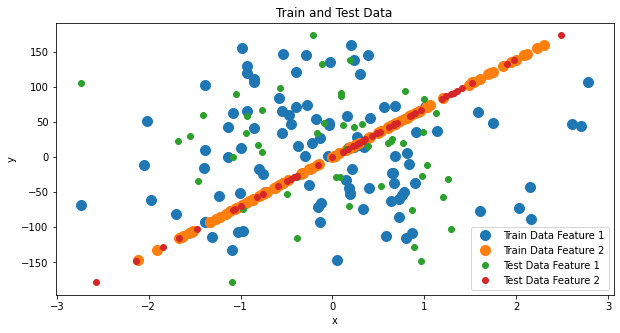

In [8]:
################################################################################
################################################################################
##### CS 5783 - Machine Learning                                           #####
##### Assignment - 2                                                       #####
##### Question - 1 - 2                                                     #####
#####                                                                      #####
##### 09/16/2022                                                           #####
#####                                                                      #####
##### Furkan Oz                                                            #####
##### foz@okstate.edu                                                      #####
################################################################################
################################################################################

# Load the data and reshape it for calculations
xArray = np.loadtxt('/content/drive/MyDrive/X_train.csv') 
yArray = np.loadtxt('/content/drive/MyDrive/Y_train.csv')

yArray = np.reshape(yArray,[np.size(xArray,0), 1])

xArray_test = np.loadtxt('/content/drive/MyDrive/X_test.csv') 
yArray_test = np.loadtxt('/content/drive/MyDrive/Y_test.csv')

yArray_test = np.reshape(yArray_test,[np.size(xArray_test,0), 1])

# Plotting
fig = plt.figure(figsize = (10, 5))

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray_test, yArray_test, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Train and Test Data")
plt.legend(['Train Data Feature 1', 'Train Data Feature 2', 'Test Data Feature 1', 'Test Data Feature 2'])
plt.show()


iteration:  50000
iteration:  100000
iteration:  150000
iteration:  200000
iteration:  250000
iteration:  300000
iteration:  350000
iteration:  400000
iteration:  450000
iteration:  500000


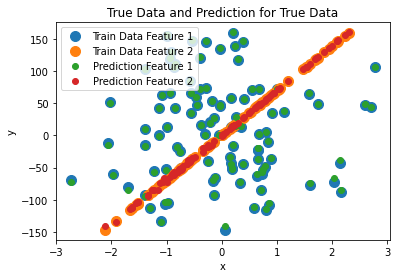

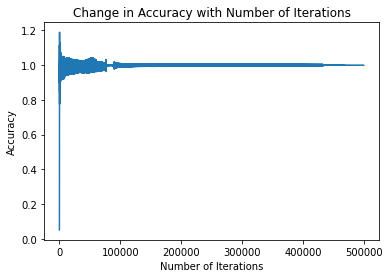

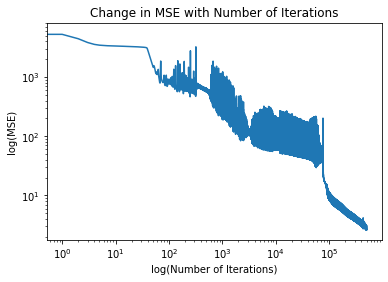

In [10]:
# Train with 10 Neuron
linreg = NeuralNetwork(NN = 10, alpha = 0.001, n_iters=500000)
ypredic, acc_train, lossVec_train, normVec_train = linreg.fit(xArray, yArray)

# Plotting
plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data")
plt.legend(['Train Data Feature 1', 'Train Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

plt.plot(normVec_train/np.linalg.norm(yArray))
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("Change in Accuracy with Number of Iterations")
plt.show()

plt.loglog(lossVec_train)
plt.xlabel("log(Number of Iterations)")
plt.ylabel("log(MSE)")
plt.title("Change in MSE with Number of Iterations")
plt.show()

Average MSE Error: [[14.55476442]]
Accuracy: 0.9679199195134851


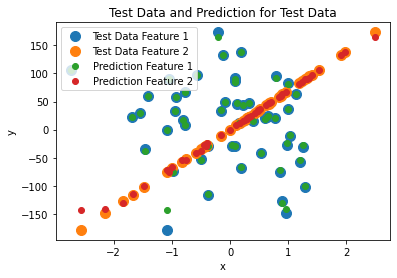

In [11]:
# Prediction with test data
ypredic_test = linreg.get_prediction(xArray_test)
lossVec_test = linreg.lossFunc(ypredic_test, yArray_test)

# Ploting
plt.plot(xArray_test, yArray_test, 'o',markersize=10)
plt.plot(xArray_test, ypredic_test, 'o')

print("Average MSE Error:", lossVec_test )
print("Accuracy:", np.linalg.norm(ypredic_test)/np.linalg.norm(yArray_test))

plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data and Prediction for Test Data")
plt.legend(['Test Data Feature 1', 'Test Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

iteration:  10000
iteration:  10000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in multiply


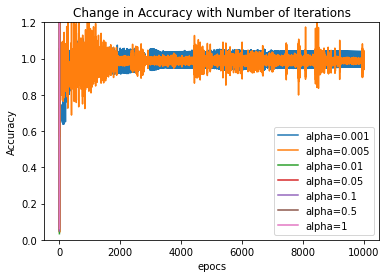

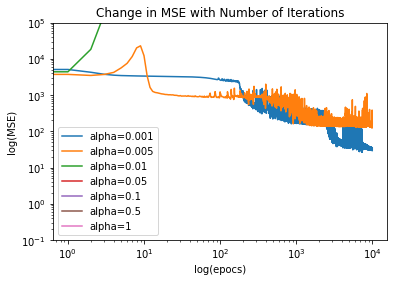

In [12]:
# Test with different learning rates
linreg_0_001 = NeuralNetwork(NN = 10, alpha = 0.001, n_iters=10000)
ypredic_0_001, acc_train_0_001, lossVec_train_0_001, normVec_train_0_001 = linreg_0_001.fit(xArray, yArray)

linreg_0_005 = NeuralNetwork(NN = 10, alpha = 0.005, n_iters=10000)
ypredic_0_005, acc_train_0_005, lossVec_train_0_005, normVec_train_0_005 = linreg_0_005.fit(xArray, yArray)

linreg_0_01 = NeuralNetwork(NN = 10, alpha = 0.01, n_iters=10000)
ypredic_0_01, acc_train_0_01, lossVec_train_0_01, normVec_train_0_01 = linreg_0_01.fit(xArray, yArray)

linreg_0_05 = NeuralNetwork(NN = 10, alpha = 0.05, n_iters=10000)
ypredic_0_05, acc_train_0_05, lossVec_train_0_05, normVec_train_0_05 = linreg_0_05.fit(xArray, yArray)

linreg_0_1 = NeuralNetwork(NN = 10, alpha = 0.1, n_iters=10000)
ypredic_0_1, acc_train_0_1, lossVec_train_0_1, normVec_train_0_1 = linreg_0_1.fit(xArray, yArray)

linreg_0_5 = NeuralNetwork(NN = 10, alpha = 0.5, n_iters=10000)
ypredic_0_5, acc_train_0_5, lossVec_train_0_5, normVec_train_0_5 = linreg_0_5.fit(xArray, yArray)

linreg_1 = NeuralNetwork(NN = 10, alpha = 1, n_iters=10000)
ypredic_1, acc_train_1, lossVec_train_1, normVec_train_1 = linreg_1.fit(xArray, yArray)

# Plotting
plt.plot(normVec_train_0_001/np.linalg.norm(yArray))
plt.plot(normVec_train_0_005/np.linalg.norm(yArray))
plt.plot(normVec_train_0_01/np.linalg.norm(yArray))
plt.plot(normVec_train_0_05/np.linalg.norm(yArray))
plt.plot(normVec_train_0_1/np.linalg.norm(yArray))
plt.plot(normVec_train_0_5/np.linalg.norm(yArray))
plt.plot(normVec_train_1/np.linalg.norm(yArray))
plt.xlabel("epocs")
plt.ylabel("Accuracy")
plt.title("Change in Accuracy with Number of Iterations")
plt.legend(['alpha=0.001','alpha=0.005','alpha=0.01','alpha=0.05','alpha=0.1','alpha=0.5','alpha=1'])
plt.ylim(0, 1.2)
plt.show()

plt.loglog(lossVec_train_0_001)
plt.loglog(lossVec_train_0_005)
plt.loglog(lossVec_train_0_01)
plt.loglog(lossVec_train_0_05)
plt.loglog(lossVec_train_0_1)
plt.loglog(lossVec_train_0_5)
plt.loglog(lossVec_train_1)
plt.xlabel("log(epocs)")
plt.ylabel("log(MSE)")
plt.title("Change in MSE with Number of Iterations")
plt.legend(['alpha=0.001','alpha=0.005','alpha=0.01','alpha=0.05','alpha=0.1','alpha=0.5','alpha=1'])
plt.ylim(1e-1, 1e+5)
plt.show()

iteration:  10000
iteration:  10000
iteration:  10000
iteration:  10000
iteration:  10000
iteration:  10000
iteration:  10000
iteration:  10000
iteration:  10000
iteration:  10000
Average MSE Error for 1 neurons: 1287.6447763599363
Average MSE Error for 2 neurons: 604.1512057188274
Average MSE Error for 3 neurons: 189.90922060771132
Average MSE Error for 4 neurons: 177.63445808478104
Average MSE Error for 5 neurons: 145.83798385666606
Average MSE Error for 6 neurons: 131.07693946753454
Average MSE Error for 7 neurons: 102.44978667510611
Average MSE Error for 8 neurons: 63.86352265896655
Average MSE Error for 9 neurons: 163.3884632279251
Average MSE Error for 10 neurons: 34.342450944691


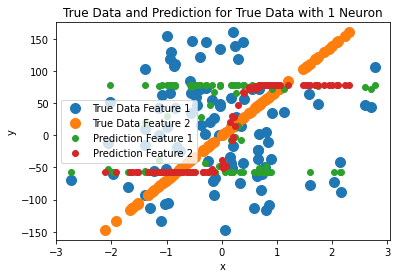

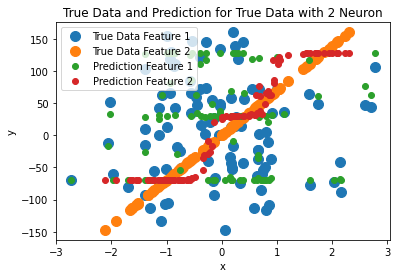

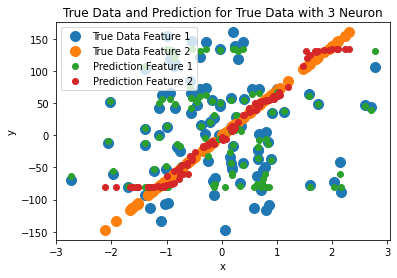

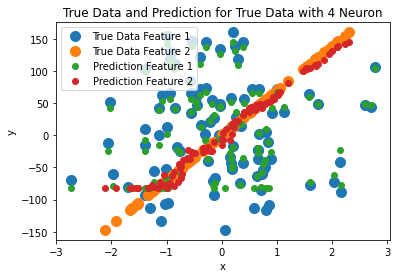

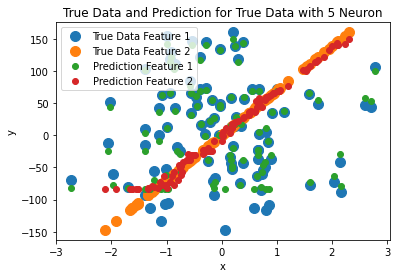

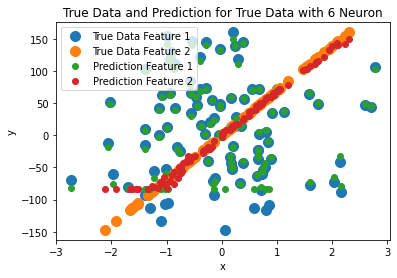

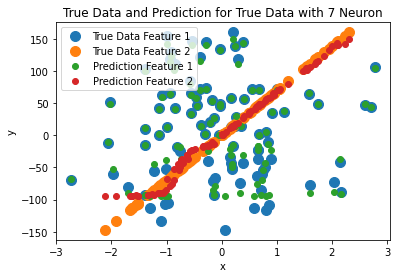

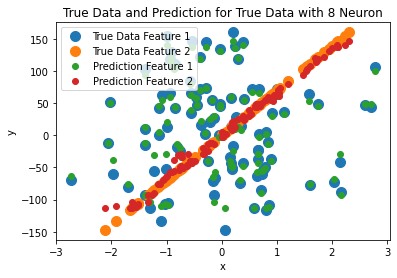

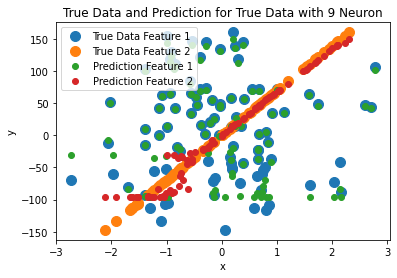

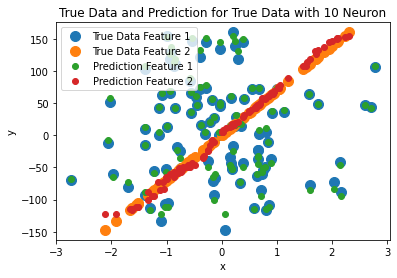

In [15]:
# Test with different number of neurons
linreg_1n = NeuralNetwork(NN = 1, alpha = 0.001, n_iters=10000)
ypredic_1n, acc_train_1n, lossVec_train_1n, normVec_train_1n = linreg_1n.fit(xArray, yArray)

linreg_2n = NeuralNetwork(NN = 2, alpha = 0.001, n_iters=10000)
ypredic_2n, acc_train_2n, lossVec_train_2n, normVec_train_2n = linreg_2n.fit(xArray, yArray)

linreg_3n = NeuralNetwork(NN = 3, alpha = 0.001, n_iters=10000)
ypredic_3n, acc_train_3n, lossVec_train_3n, normVec_train_3n = linreg_3n.fit(xArray, yArray)

linreg_4n = NeuralNetwork(NN = 4, alpha = 0.001, n_iters=10000)
ypredic_4n, acc_train_4n, lossVec_train_4n, normVec_train_4n = linreg_4n.fit(xArray, yArray)

linreg_5n = NeuralNetwork(NN = 5, alpha = 0.001, n_iters=10000)
ypredic_5n, acc_train_5n, lossVec_train_5n, normVec_train_5n = linreg_5n.fit(xArray, yArray)

linreg_6n = NeuralNetwork(NN = 6, alpha = 0.001, n_iters=10000)
ypredic_6n, acc_train_6n, lossVec_train_6n, normVec_train_6n = linreg_6n.fit(xArray, yArray)

linreg_7n = NeuralNetwork(NN = 7, alpha = 0.001, n_iters=10000)
ypredic_7n, acc_train_7n, lossVec_train_7n, normVec_train_7n = linreg_7n.fit(xArray, yArray)

linreg_8n = NeuralNetwork(NN = 8, alpha = 0.001, n_iters=10000)
ypredic_8n, acc_train_8n, lossVec_train_8n, normVec_train_8n = linreg_8n.fit(xArray, yArray)

linreg_9n = NeuralNetwork(NN = 9, alpha = 0.001, n_iters=10000)
ypredic_9n, acc_train_9n, lossVec_train_9n, normVec_train_9n = linreg_9n.fit(xArray, yArray)

linreg_10n = NeuralNetwork(NN = 10, alpha = 0.001, n_iters=10000)
ypredic_10n, acc_train_10n, lossVec_train_10n, normVec_train_10n = linreg_10n.fit(xArray, yArray)

# Plotting
print("Average MSE Error for 1 neurons:", lossVec_train_1n[-1] )
print("Average MSE Error for 2 neurons:", lossVec_train_2n[-1] )
print("Average MSE Error for 3 neurons:", lossVec_train_3n[-1] )
print("Average MSE Error for 4 neurons:", lossVec_train_4n[-1] )
print("Average MSE Error for 5 neurons:", lossVec_train_5n[-1] )
print("Average MSE Error for 6 neurons:", lossVec_train_6n[-1] )
print("Average MSE Error for 7 neurons:", lossVec_train_7n[-1] )
print("Average MSE Error for 8 neurons:", lossVec_train_8n[-1] )
print("Average MSE Error for 9 neurons:", lossVec_train_9n[-1] )
print("Average MSE Error for 10 neurons:", lossVec_train_10n[-1] )

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_1n, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with 1 Neuron")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_2n, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with 2 Neuron")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_3n, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with 3 Neuron")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_4n, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with 4 Neuron")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_5n, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with 5 Neuron")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_6n, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with 6 Neuron")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_7n, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with 7 Neuron")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_8n, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with 8 Neuron")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_9n, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with 9 Neuron")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_10n, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with 10 Neuron")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

iteration:  50000
iteration:  10724
Model converged! Final Jacobian of training:  0.7981045563005887
iteration:  50000
Average MSE Error for 1 neurons: 49.072250228586455
Average MSE Error for 2 neurons: 0.006369708827877597
Average MSE Error for 3 neurons: 1.890108943195591


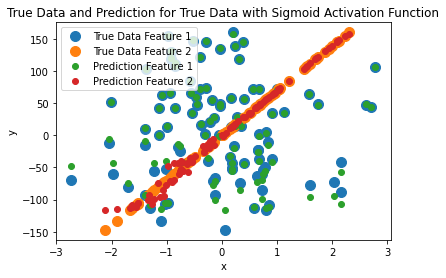

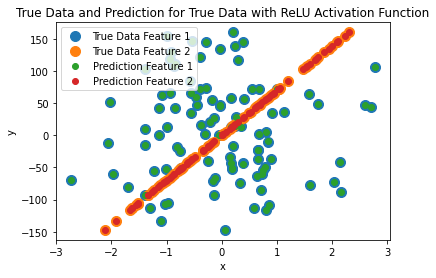

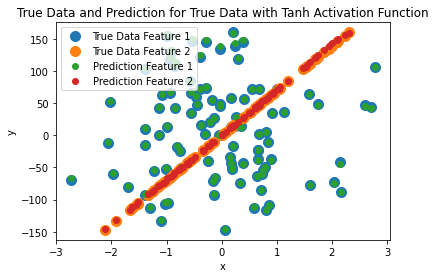

In [17]:
# Test with different Activation functions
linreg_sig = NeuralNetwork(NN = 10, alpha = 0.0001, n_iters=50000, eps=1e-6, activationFunction='sigmoid')
ypredic_sig, acc_train_sig, lossVec_train_sig, normVec_train_sig = linreg_sig.fit(xArray, yArray)

linreg_rel = NeuralNetwork(NN = 10, alpha = 0.0001, n_iters=50000, eps=1e-6, activationFunction='ReLU')
ypredic_rel, acc_train_rel, lossVec_train_rel, normVec_train_rel = linreg_rel.fit(xArray, yArray)

linreg_tanh = NeuralNetwork(NN = 10, alpha = 0.0001, n_iters=50000, eps=1e-6, activationFunction='tanh')
ypredic_tanh, acc_train_tanh, lossVec_train_tanh, normVec_train_tanh = linreg_tanh.fit(xArray, yArray)

# Plotting
print("Average MSE Error for 1 neurons:", lossVec_train_sig[-1] )
print("Average MSE Error for 2 neurons:", lossVec_train_rel[-1] )
print("Average MSE Error for 3 neurons:", lossVec_train_tanh[-1] )

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_sig, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with Sigmoid Activation Function")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_rel, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with ReLU Activation Function")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()

plt.plot(xArray, yArray, 'o',markersize=10)
plt.plot(xArray, ypredic_tanh, 'o')

plt.xlabel("x")
plt.ylabel("y")
plt.title("True Data and Prediction for True Data with Tanh Activation Function")
plt.legend(['True Data Feature 1', 'True Data Feature 2', 'Prediction Feature 1', 'Prediction Feature 2'])
plt.show()
